# **Overview**

#### **Context**
The growth of supermarkets in most populated cities is increasing, and market competition is also high. The dataset represents historical sales data from a supermarket company, recorded across three different branches over three months.

#### **Stakeholder Request:**  

We've been analyzing our sales performance across the three branches and noticed that while revenue is fairly consistent, there may be underlying differences in customer behavior, product preferences, and shopping patterns. We want to understand what drives customer spending, how product lines perform across locations, and whether certain factors—such as payment methods, time of purchase, or customer type—impact sales. Additionally, we want insights into overall sales trends over the past three months to guide future business decisions.

#### **Key Business Questions:**  
1. Which branch generates the **highest and lowest revenue**?  
2. How do **product line sales** vary across branches?  
3. Does **customer type (Members vs. Normal)** affect sales differently at each branch?  
4. What are the **peak shopping hours** for each branch?
5. What are the **peak shopping days of the week** for each branch?
6. Are certain **payment methods** more popular at specific branches?  
7. Do **customer satisfaction ratings** differ by branch, and do they correlate with revenue?
8. What are the trends in revenue over the past 3 months?

In [570]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

plt.style.use('seaborn-v0_8-muted')  # Change style here


# Data Gathering

The dataset is available in Kaggle and you can download it from this link [here](https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales). It consists of 17 columns and 1000 rows.

#### **Attribute Information:**

- **Invoice ID**: Computer-generated sales slip invoice identification number.  
- **Branch**: Branch of the supercenter (3 branches are available, identified as A, B, and C).  
- **City**: Location of the supercenters.  
- **Customer Type**: Type of customers, recorded as:
  - **Member**: Customers using a member card.  
  - **Normal**: Customers without a member card.  
- **Gender**: Gender of the customer.  
- **Product Line**: General item categorization groups:
  - Electronic accessories  
  - Fashion accessories  
  - Food and beverages  
  - Health and beauty  
  - Home and lifestyle  
  - Sports and travel  
- **Unit Price**: Price of each product in dollars ($).  
- **Quantity**: Number of products purchased by the customer.  
- **Tax**: 5% tax fee applied to customer purchases.  
- **Total**: Total price including tax.  
- **Date**: Date of purchase (Records available from January 2019 to March 2019).  
- **Time**: Purchase time (Between 10 AM and 9 PM).  
- **Payment**: Payment method used by the customer (Three methods available: Cash, Credit Card, and E-wallet).  
- **COGS**: Cost of goods sold.  
- **Gross Margin Percentage**: Gross margin percentage.  
- **Gross Income**: Gross income.  
- **Rating**: Customer satisfaction rating on their overall shopping experience (On a scale of 1 to 10).  

In [572]:
df = pd.read_csv('./dataset/supermarket_sales - Sheet1.csv')

# Data Assessing

In [574]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [575]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [576]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [577]:
cat_cols = ['Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Payment']
for col in cat_cols:
    print(df[col].unique())
    print('-' * 40)

['A' 'C' 'B']
----------------------------------------
['Yangon' 'Naypyitaw' 'Mandalay']
----------------------------------------
['Member' 'Normal']
----------------------------------------
['Female' 'Male']
----------------------------------------
['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
----------------------------------------
['Ewallet' 'Cash' 'Credit card']
----------------------------------------


In [578]:
df['gross margin percentage'].value_counts()

gross margin percentage
4.761905    1000
Name: count, dtype: int64

In [579]:
(100 * df['gross income'] / df['Total']).round(6).unique()

array([4.761905])

- They have a fixed gross margin of approximately 4.8%.

In [581]:
(df['gross income'] == df['Tax 5%']).all()

True

- We found that they only make a profit from the 5% tax added to the total price. That explains why they have a fixed gross margin.

In [583]:
# check that gross income is calculated correctly

((df.Total - df.cogs).round(4) == df['gross income']).all()

True

In [584]:
((df['gross income'] / df.Total) * 100).round(6)

0      4.761905
1      4.761905
2      4.761905
3      4.761905
4      4.761905
         ...   
995    4.761905
996    4.761905
997    4.761905
998    4.761905
999    4.761905
Length: 1000, dtype: float64

In [585]:
df.duplicated().sum()

0

In [586]:
# let's ensure that every city has a unique branch
df[['City', 'Branch']].drop_duplicates()

,City,Branch
0,Yangon,A
1,Naypyitaw,C
9,Mandalay,B


#### Data Assessment Conclusion:
- No missing values
- No duplicate rows
- No inconsistencies issues in categorical columns
- Measures are calculated correctly
- They have a fixed gross margin of approximately 4.8%
#### Data Quality Issues
- The `Date` and `Time` columns have an incorrect data type

# Data Cleaning

In [589]:
df_clean = df.copy()

##### Change `Date` column data type from `object` to `datetime` using `pd.to_datetime`

In [591]:
df_clean['Date'] = pd.to_datetime(df_clean['Date'])

##### Test

In [593]:
df_clean['Date'].head()

0   2019-01-05
1   2019-03-08
2   2019-03-03
3   2019-01-27
4   2019-02-08
Name: Date, dtype: datetime64[ns]

##### Extract the hour from the `Time` column

In [595]:
df_clean['hour'] = df_clean.Time.apply(lambda x: x.split(':')[0])

##### Test

In [597]:
df_clean['hour'].value_counts()

hour
19    113
13    103
15    102
10    101
18     93
11     90
12     89
14     83
16     77
20     75
17     74
Name: count, dtype: int64

##### Extract the day of the week from the Date column

In [599]:
df_clean['day_of_week'] = df_clean.Date.dt.day_name().str[:3]

##### Test

In [601]:
df_clean['day_of_week'].head()

0    Sat
1    Fri
2    Sun
3    Sun
4    Fri
Name: day_of_week, dtype: object

##### Rename `Total` to `Revenue`

In [603]:
df_clean = df_clean.rename(columns={'Total': 'Revenue'})

##### Test

In [605]:
df_clean.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Revenue', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'hour', 'day_of_week'],
      dtype='object')

##### Drop unnecessary column for analysis
- Every city has a branch, so we can drop either the `Branch` or `City` column since they contain redundant information.  
- The `gross margin percentage` is a fixed value for all orders. As mentioned earlier, the company only makes a profit from the 5% tax applied to each order's total price. Therefore, the `gross income` equals the `Tax 5%`, so I will drop the `Tax 5%` column and the `gross margin percentage`.  
- Since we have already extracted the `hour` from the `Time` column, we can drop it now.


In [607]:
cols_to_drop = ['Branch', 'Tax 5%', 'Time', 'gross margin percentage']

df_clean = df_clean.drop(columns=cols_to_drop, axis=1)

In [608]:
df_clean.head()

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Revenue,Date,Payment,cogs,gross income,Rating,hour,day_of_week
0,750-67-8428,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,2019-01-05,Ewallet,522.83,26.1415,9.1,13,Sat
1,226-31-3081,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,2019-03-08,Cash,76.40,3.8200,9.6,10,Fri
2,631-41-3108,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,2019-03-03,Credit card,324.31,16.2155,7.4,13,Sun
3,123-19-1176,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,2019-01-27,Ewallet,465.76,23.2880,8.4,20,Sun
4,373-73-7910,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,2019-02-08,Ewallet,604.17,30.2085,5.3,10,Fri


# Exploratory Data Analysis

In [610]:
df_clean.describe(include=np.number)

,Unit price,Quantity,Revenue,cogs,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,55.672130,5.510000,322.966749,307.58738,15.379369,6.97270
std,26.494628,2.923431,245.885335,234.17651,11.708825,1.71858
min,10.080000,1.000000,10.678500,10.17000,0.508500,4.00000
25%,32.875000,3.000000,124.422375,118.49750,5.924875,5.50000
50%,55.230000,5.000000,253.848000,241.76000,12.088000,7.00000
75%,77.935000,8.000000,471.350250,448.90500,22.445250,8.50000
max,99.960000,10.000000,1042.650000,993.00000,49.650000,10.00000


- The mean and median of the unit price are very close to each other. The cheapest product has a unit price of \\$10, while the most expensive one has a unit price of \\$100.  
- The highest order size is 10.  
- The mean revenue is larger than the median, which implies a right-skewed distribution and the presence of outliers.  
- The lowest rating a client has given is 4.

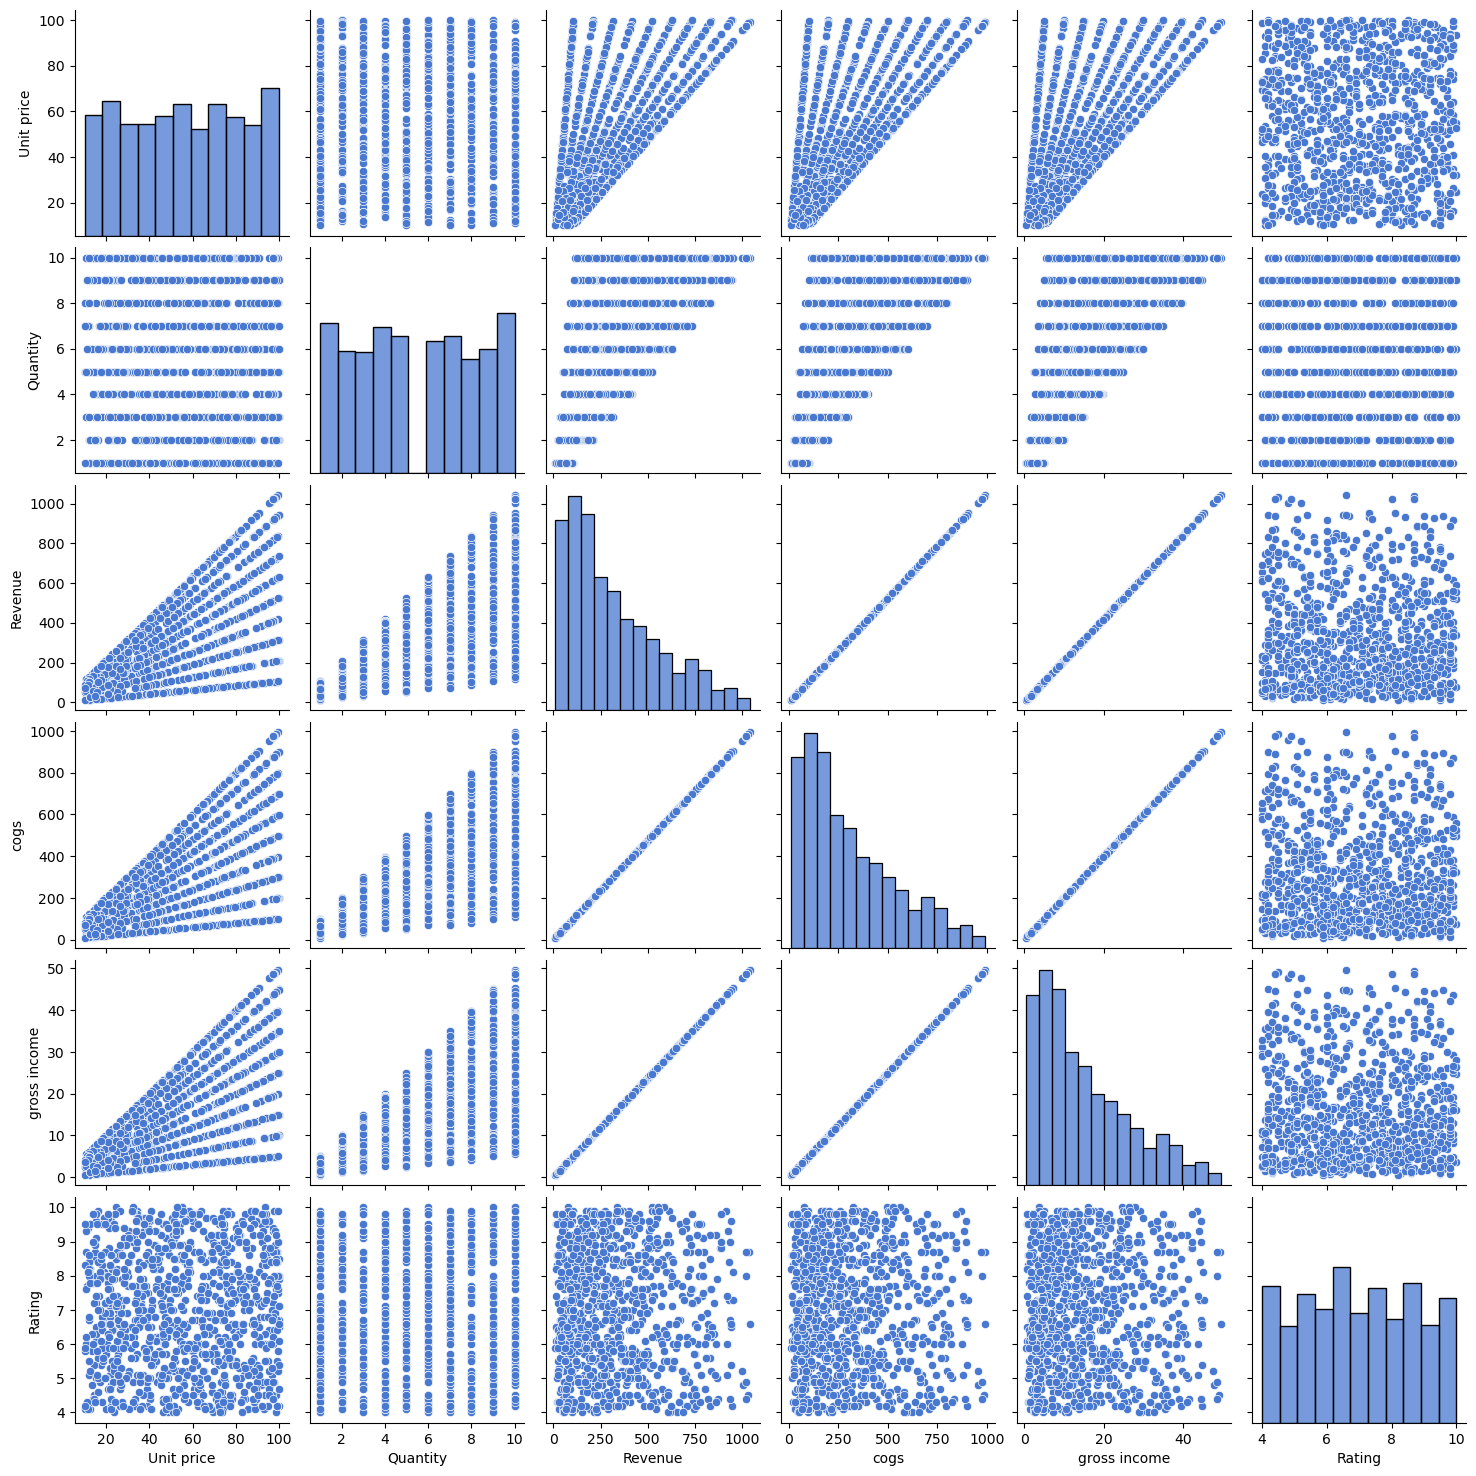

In [612]:
sns.pairplot(df_clean)
plt.show()

- We can see that the revenue is right-skewed, as expected, and most of the orders have revenue less that \\$500.
- There is no relationship between revenue and rating.
- Unit price, quantity, and rating have an approximately uniform distribution.

# Drawing Conclusions

#### Which branch generates the highest and lowest revenue?  

In [616]:
df_clean.columns

Index(['Invoice ID', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Revenue', 'Date', 'Payment', 'cogs',
       'gross income', 'Rating', 'hour', 'day_of_week'],
      dtype='object')

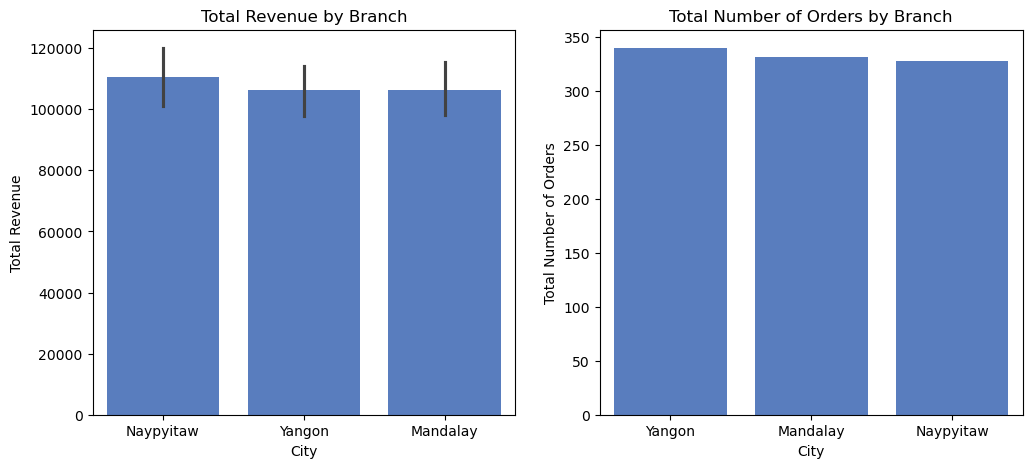

In [617]:
branch_revenue = df_clean.groupby('City')['Revenue'].sum().sort_values(ascending=False)
branch_orders = df_clean.City.value_counts()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=df_clean, x='City', y='Revenue', 
            order=branch_revenue.index,
            estimator='sum')
plt.title('Total Revenue by Branch')
plt.ylabel('Total Revenue')

plt.subplot(1, 2, 2)
sns.countplot(data=df_clean, x='City', order=branch_orders.index)
plt.title('Total Number of Orders by Branch')
plt.ylabel('Total Number of Orders')
plt.show()

- The Naypyitaw branch shows slightly higher revenue than the other branches.  
- However, the overlapping confidence intervals suggest that this difference may not be statistically significant, meaning we cannot confidently generalize this trend beyond the observed data.  
- Although the Yangon and Mandalay branches sold slightly more orders than the Naypyitaw branch, Naypyitaw has higher revenue, indicating that it sold more high-value orders.

#### How do product line sales vary across branches?  

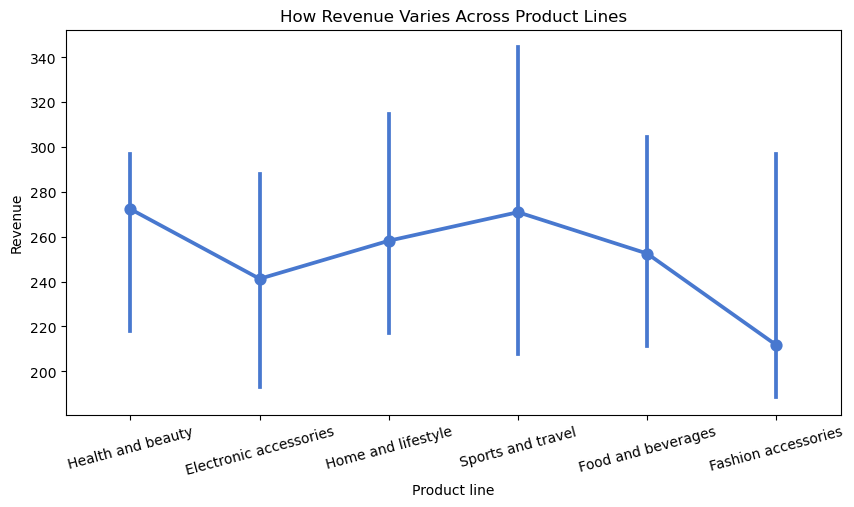

In [620]:
plt.figure(figsize=(10, 5))
sns.pointplot(data=df_clean, x='Product line', y='Revenue', estimator='median')
plt.title('How Revenue Varies Across Product Lines')
plt.xticks(rotation=15)
plt.show()

- `Fashion accessories` has the lowest revenue while `Health and beauty` and `Sports and travel` achieve the highest.
- Additionally, there is an overlap between the confidence intervals so we don't have statistically significant evidence to generalize these differences beyond the observed data.

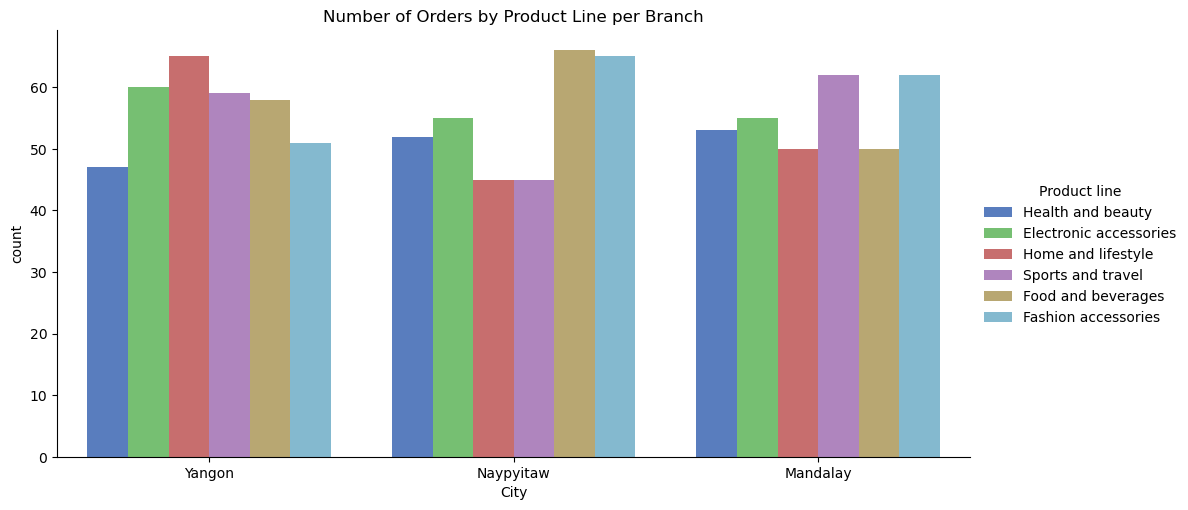

In [622]:
sns.catplot(data=df_clean, x='City', kind='count', hue='Product line', aspect=2)
plt.title('Number of Orders by Product Line per Branch')
plt.show()

`Home and Lifestyle` is the most ordered product line in Yangon. However, `Food and Beverages` and `Fashion Accessories` are the most ordered in Naypyitaw. In Mandalay, `Sports and Travel` and `Fashion Accessories` are the most ordered.

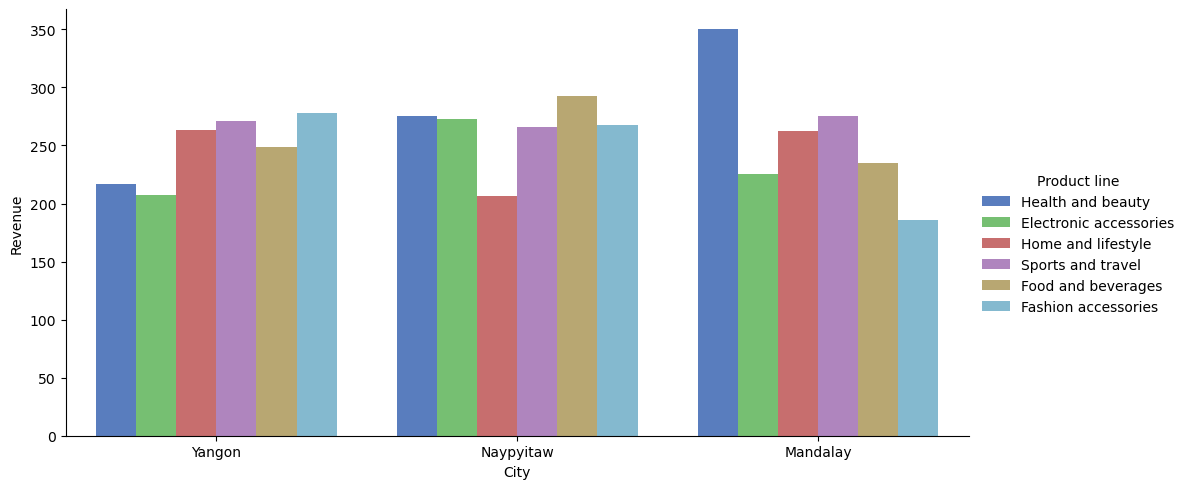

In [624]:
sns.catplot(data=df_clean, x='City', y='Revenue', kind='bar', hue='Product line', aspect=2, 
            estimator='median',
            errorbar=None)
plt.show()

- We can see that `Health and Beauty` has the highest revenue in Mandalay.  
- However, `Health and Beauty` and `Electronic Accessories` have the lowest revenue in Yangon.  
- Additionally, `Home and Lifestyle` has the lowest revenue in Naypyitaw.

In [751]:
revenue_and_order_count_by_city_branch = df_clean.groupby(['City', 'Product line'], as_index=False)\
.agg(Median_Revenue=('Revenue', 'median'), Orders_Count=('Invoice ID', 'count'), Average_Quantity=('Quantity', 'mean'))
revenue_and_order_count_by_city_branch

,City,Product line,Median_Revenue,Orders_Count,Average_Quantity
0,Mandalay,Electronic accessories,225.01500,53,5.735849
1,Mandalay,Fashion accessories,185.75550,62,4.790323
2,Mandalay,Food and beverages,234.80100,48,5.250000
3,Mandalay,Health and beauty,350.07000,53,6.037736
4,Mandalay,Home and lifestyle,262.58400,50,5.900000
5,Mandalay,Sports and travel,275.31000,62,5.193548
6,Naypyitaw,Electronic accessories,274.76400,54,6.129630
7,Naypyitaw,Fashion accessories,267.34050,65,5.261538
8,Naypyitaw,Food and beverages,292.54050,66,5.590909
9,Naypyitaw,Health and beauty,277.78800,51,5.392157


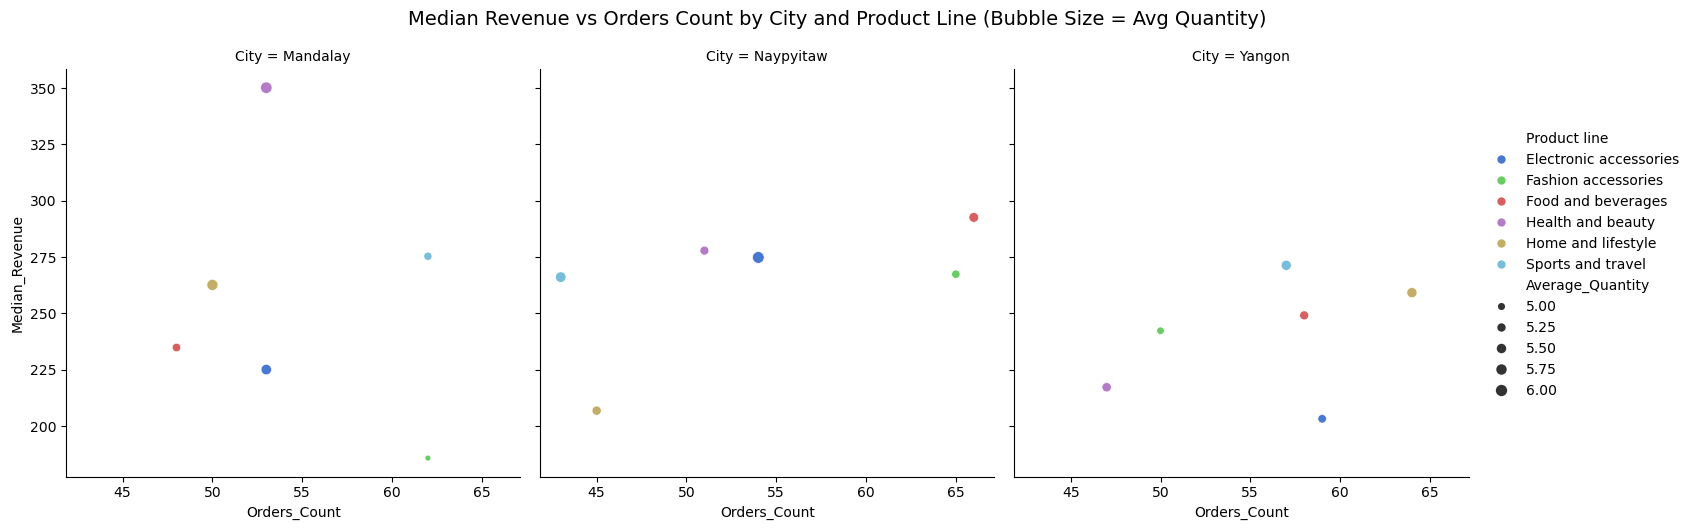

In [755]:
g = sns.relplot(x='Orders_Count', y='Median_Revenue', data=revenue_and_order_count_by_city_branch,
            kind='scatter', col='City', hue='Product line', size='Average_Quantity')

g.fig.suptitle('Median Revenue vs Orders Count by City and Product Line (Bubble Size = Avg Quantity)', fontsize=14, y=1.05)

plt.show()

- In Mandalay, despite `Health and Beauty` not having the highest number of orders, it achieves the highest revenue among all categories in all cities. Additionally, the `Sports and Travel` category has higher revenue than `Fashion Accessories` despite having the same number of orders.  
- In Naypyitaw, all categories are performing well compared to other categories in other cities, except for the `Home and Lifestyle` category, which has low revenue and a low number of orders.  
- In Yangon, the `Electronic Accessories` category has a high number of orders but low revenue. Also, the `Health and Lifestyle` category has both low revenue and a low number of orders.

#### Does customer type (Members vs. Normal) affect sales differently at each branch? 

In [630]:
df_clean.columns

Index(['Invoice ID', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Revenue', 'Date', 'Payment', 'cogs',
       'gross income', 'Rating', 'hour', 'day_of_week'],
      dtype='object')

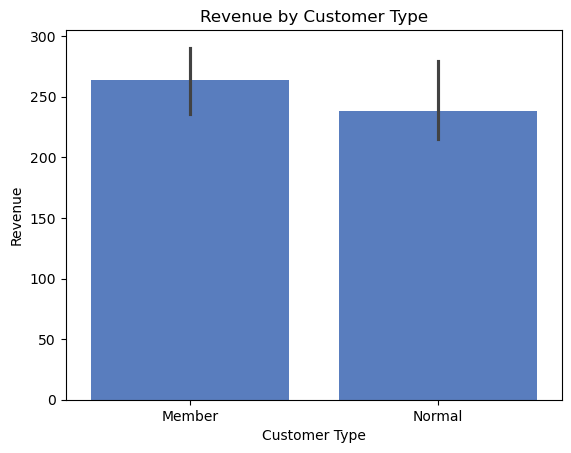

In [759]:
sns.barplot(x='Customer type', y='Revenue', data=df_clean, estimator='median')
plt.title('Revenue by Customer Type')
plt.xlabel('Customer Type')
plt.show()

- We can see that customers who are members achieve slightly higher revenue than those who are not.

In [633]:
revenue_and_order_count_by_city_customer= df_clean.groupby(['City', 'Customer type'], as_index=False)\
.agg(median_revenue=('Revenue', 'median'), orders_count=('Invoice ID', 'count'))
revenue_and_order_count_by_city_customer

,City,Customer type,median_revenue,orders_count
0,Mandalay,Member,258.6780,165
1,Mandalay,Normal,231.2415,167
2,Naypyitaw,Member,270.2595,169
3,Naypyitaw,Normal,277.7880,159
4,Yangon,Member,262.4580,167
5,Yangon,Normal,226.0650,173


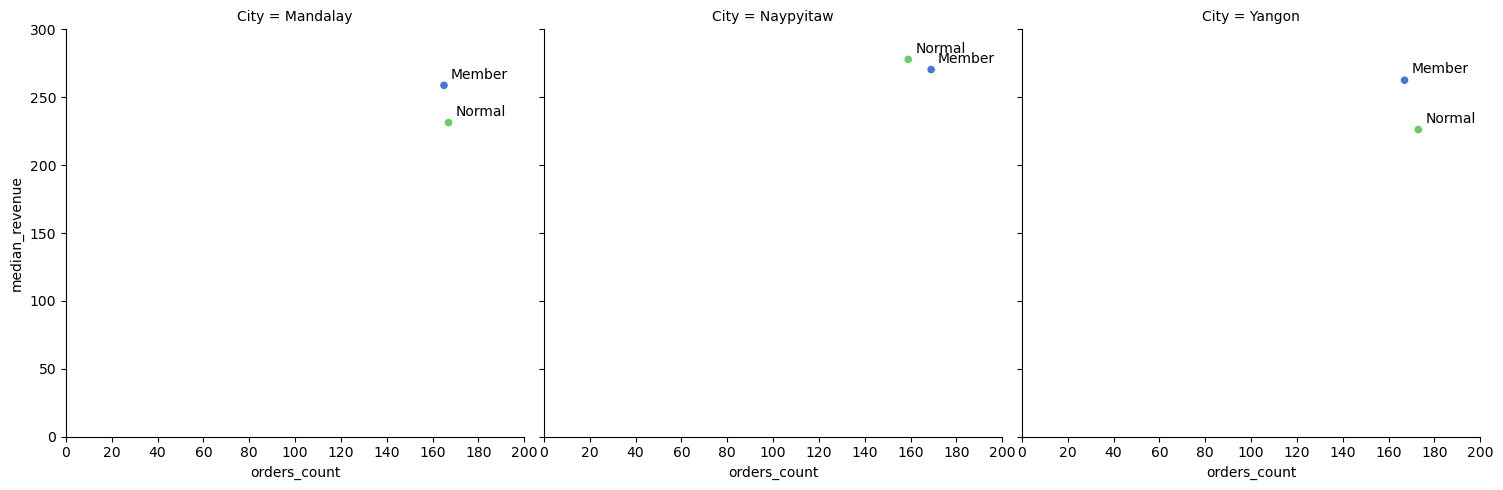

In [769]:
g = sns.relplot(x='orders_count', y='median_revenue', data=revenue_and_order_count_by_city_customer,
            kind='scatter', col='City', hue='Customer type',
               legend=False)

for ax, city in zip(g.axes.flat, revenue_and_order_count_by_city_customer.City.unique()):
        for i, point in revenue_and_order_count_by_city_customer.query("City == @city").iterrows():
            ax.annotate(
                text=point["Customer type"], 
                xy=(point["orders_count"], point["median_revenue"]),
                xytext=(5,5),  
                textcoords="offset points",
                fontsize=10,
                color="black"
            )
y_ticks = np.arange(0, 280 + 50, 50)
x_ticks = np.arange(0, 200 + 20, 20)
plt.yticks(y_ticks, y_ticks)
plt.xticks(x_ticks, x_ticks)
plt.show()

- In Mandalay and Yangon, members generate higher revenue than normal customers, but normal customers place more orders.  
- In Naypyitaw, revenue is very close between both groups, but member customers have more orders than normal customers.  
- Overall, regardless of the supermarket branch, member customers contribute more to revenue.

#### What are the peak shopping hours for each branch?  

In [637]:
order_count_by_hour_and_branch = df_clean.groupby(['City'], as_index=False)['hour'].value_counts()
order_count_by_hour_and_branch = order_count_by_hour_and_branch.sort_values(by='hour')

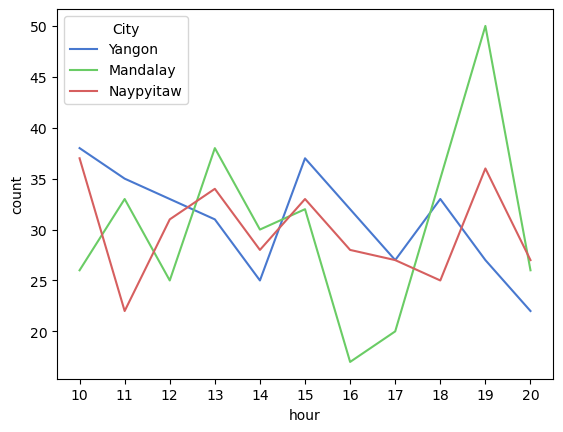

In [638]:
sns.lineplot(data=order_count_by_hour_and_branch, 
            x='hour', 
            y='count',
            hue='City')
plt.show()

- The order count in the Mandalay branch significantly dropped at 16:00 and 17:00 before rising again, reaching its peak at 19:00.
- In Naypyitaw and Yangon, order counts fluctuate normally throughout the day and never drop below 20 or exceed 40 in any given hour.
- **Recommendation:**
    - We must analyze how Mandalay reached 50 orders at 19:00 and attempt to implement similar strategies in other branches.
    - Additionally, we need to investigate why the order counts drop significantly at 16:00 and 17:00.

#### What are the peak shopping days of the week for each branch?  
   - Create a count plot to show the distribution of the number of orders per day of the week per branch. 

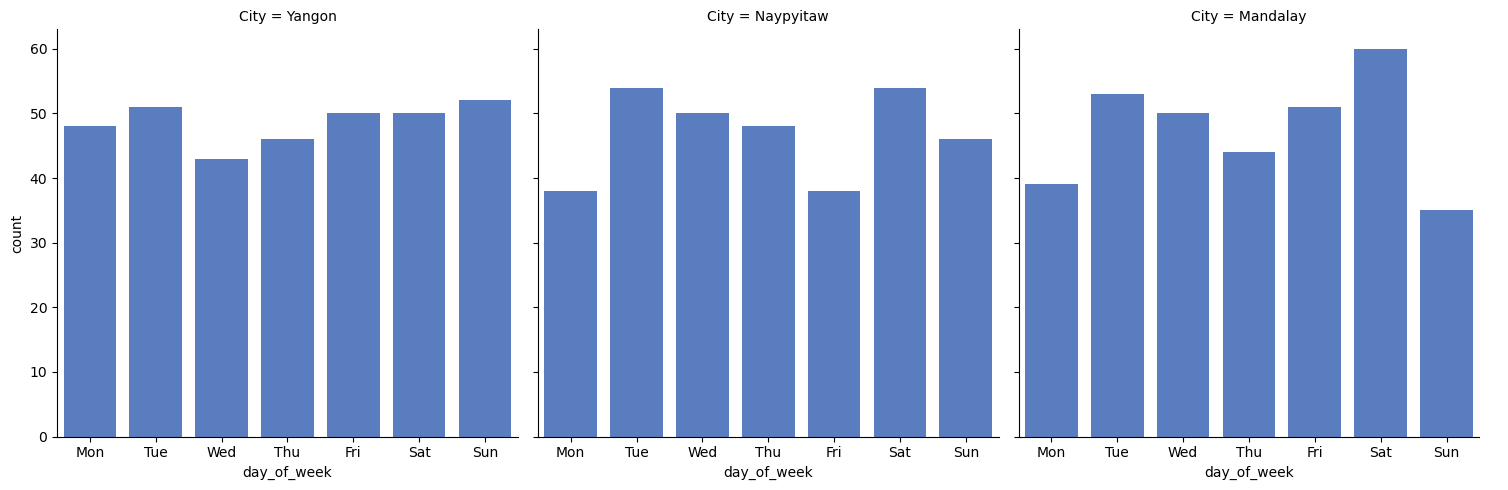

In [641]:
order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sns.catplot(data=df_clean, x='day_of_week', col='City', 
            order = order,
            kind='count')
plt.show()

- The Yangon branch has the lowest number of orders on Wednesday and Thursday compared to other days.  
- The Naypyitaw branch has the lowest number of orders on Monday and Friday, while the highest number of orders occurs on Tuesday and Saturday.  
- The Mandalay branch has the lowest number of orders on Monday and Sunday, with the highest number of orders on Saturday.

#### Are certain payment methods more popular at specific branches? 

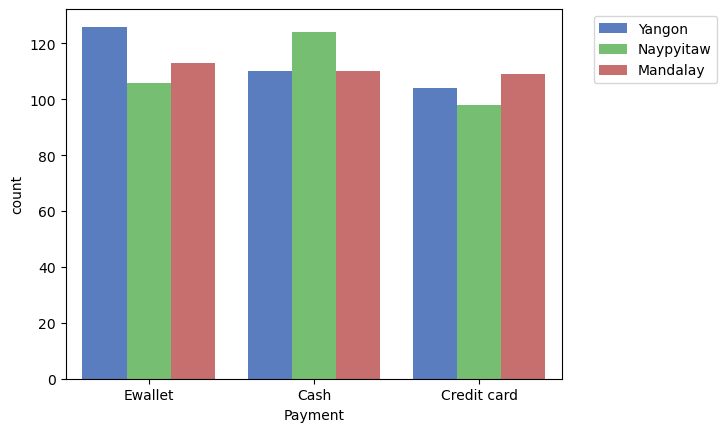

In [644]:
sns.countplot(data=df_clean, x='Payment', hue='City')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- E-wallets are used more in the Yangon branch, while cash is used more in the Naypyitaw branch, and credit cards are used more in the Mandalay branch.

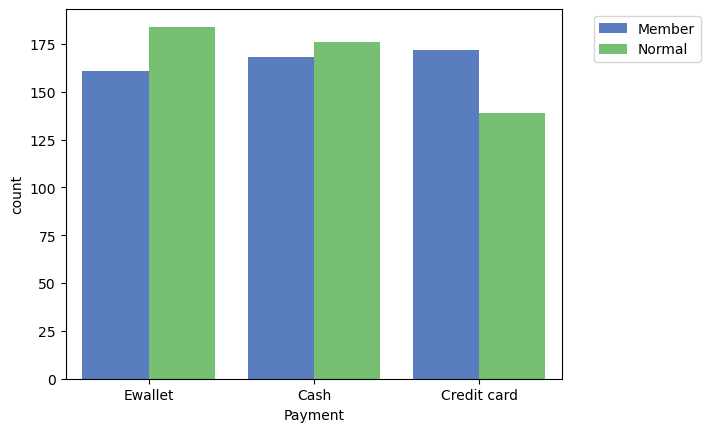

In [646]:
sns.countplot(data=df_clean, x='Payment', hue='Customer type')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- Members use credit cards more than normal customers. On the other hand, normal customers use e-wallets and cash more than member customers.

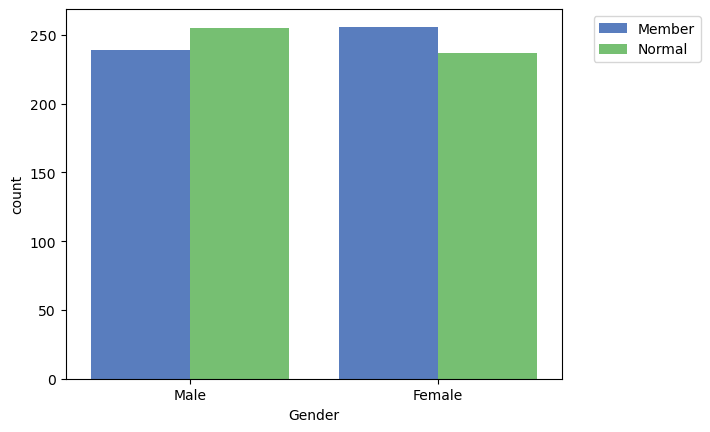

In [724]:
sns.countplot(data=df_clean, x='Gender', hue='Customer type')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Do customer satisfaction ratings differ by branch, and do they correlate with revenue?  
   - Create a violin plot to examine the distribution of ratings for each branch.  
   - Create a scatter plot between revenue and ratings by branch. 

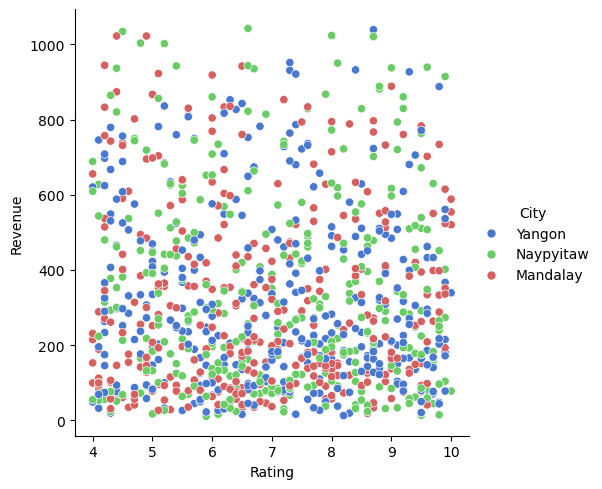

In [649]:
sns.relplot(x='Rating', y='Revenue', data=df_clean, hue='City')
plt.show()

- There is no relationship between rating and revenue.

In [651]:
low_rating_orders = df_clean.query('Rating < 6')

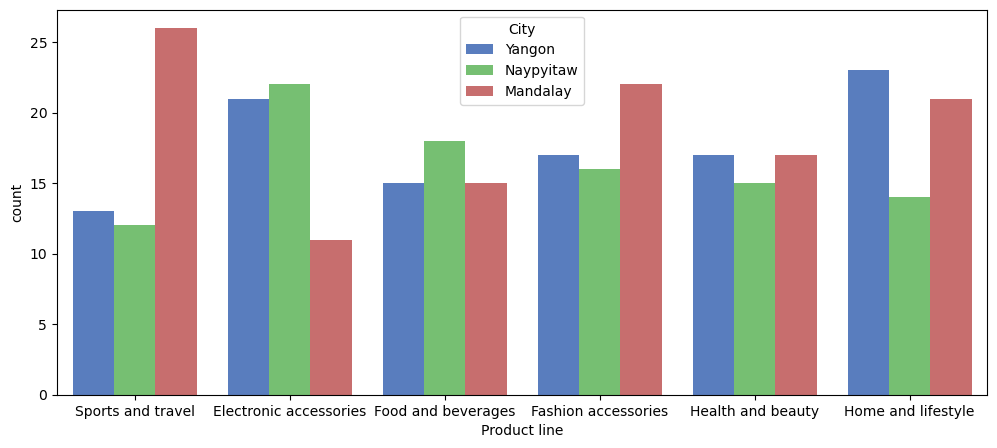

In [652]:
plt.figure(figsize=(12, 5))
sns.countplot(data=low_rating_orders, x='Product line', hue='City')
plt.show()

- Most of the low-rated orders in the `Sports and travel` and `Fashion accessories` categories are in the Mandalay branch.  
- Most of the low-rated orders in `Electronic accessories` are in the Yangon and Naypyitaw branches.  
- Most of the low-rated orders in `Food and beverages` are in the Naypyitaw branch.  
- Most of the low-rated orders in `Home and Style` are in the Yangon and Mandalay branches.

#### What are the trends in revenue over the past three months?  
   - Create a line plot to identify any trends in revenue over the past three months.

In [655]:
mean_revenue = df_clean.groupby('Date').Revenue.mean().sort_values()
highest_revenue = mean_revenue.tail(1)
lowest_revenue = mean_revenue.head(1)

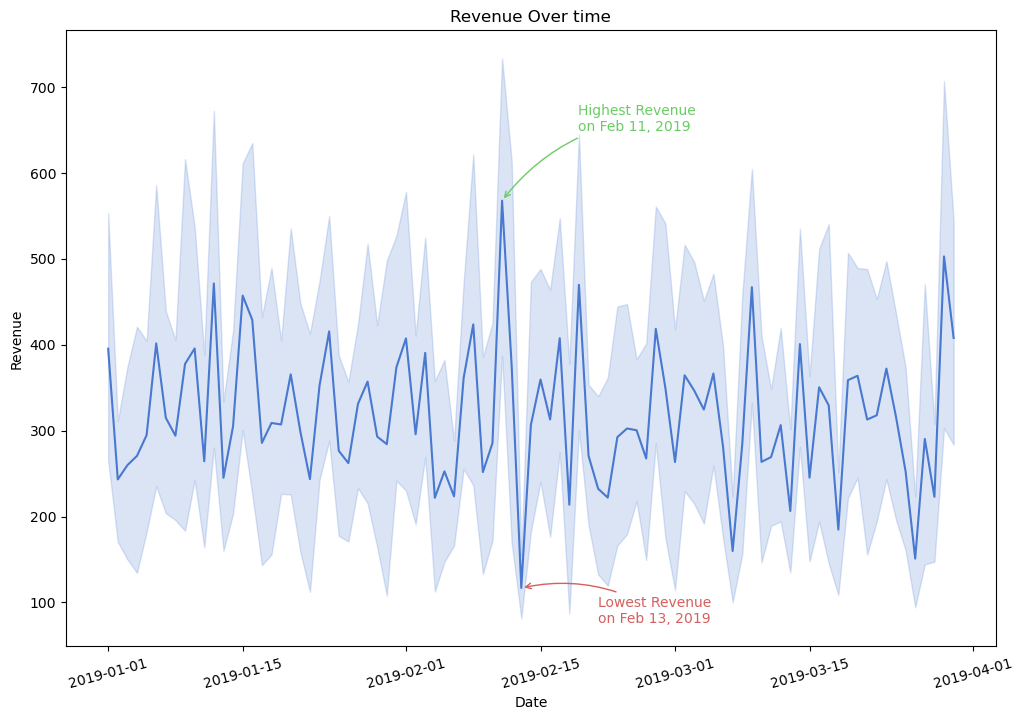

In [656]:
plt.figure(figsize=(12, 8))

ax = sns.lineplot(data=df_clean, x='Date', y='Revenue')

plt.xticks(rotation=15)
plt.title('Revenue Over time')

# Annotate Highest Revenue Point
ax.annotate(f'Highest Revenue \non {highest_revenue.index[0].strftime("%b %d, %Y")}', 
            (mdates.date2num(highest_revenue.index[0]), highest_revenue.iloc[0]), 
            color=sns.color_palette()[1],
            xytext=(55, 50), textcoords='offset points', 
            arrowprops=dict(arrowstyle='->', connectionstyle="arc3,rad=.2", 
                            color=sns.color_palette()[1]))

# Annotate Lowest Revenue Point
ax.annotate(f'Lowest Revenue \non {lowest_revenue.index[0].strftime("%b %d, %Y")}', 
            (mdates.date2num(lowest_revenue.index[0]), lowest_revenue.iloc[0]), 
            color=sns.color_palette()[2],
            xytext=(55, -25), textcoords='offset points', 
            arrowprops=dict(arrowstyle='->', connectionstyle="arc3,rad=.2", 
                            color=sns.color_palette()[2]))
plt.show()

- There are significant fluctuations in revenue, and interestingly, we achieved both the highest and lowest revenue in February.

In [658]:
df_clean = df_clean.sort_values(by='Date')
df_clean['mm_Revenue'] = df_clean.Revenue.rolling(window=14).mean()
df_clean = df_clean.dropna()

Text(0.5, 1.0, '14-Day Moving Average of Revenue Over time')

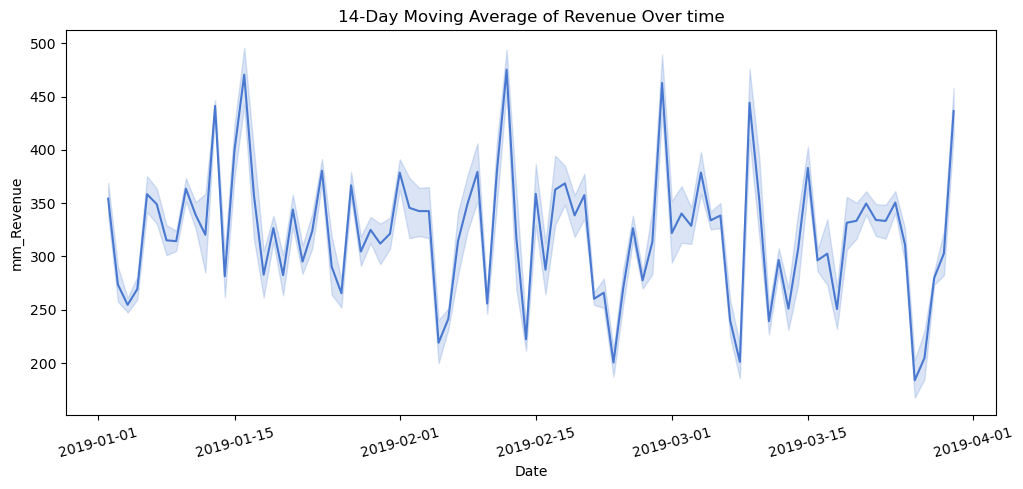

In [659]:
plt.figure(figsize=(12, 5))
ax = sns.lineplot(data=df_clean, x='Date', y='mm_Revenue', estimator='mean')

plt.xticks(rotation=15)
plt.title('14-Day Moving Average of Revenue Over time')

- In general, We can say that there is a sudden increase in revenue at the start or the middle of each month.

Let's look at the orders that generate high revenue.

In [726]:
# Calculating Q1 and Q3
Q1 = df_clean['Revenue'].quantile(0.25)
Q3 = df_clean['Revenue'].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1
upper_limit = Q3 + IQR * 1.5
high_revenue_orders = df_clean[df_clean['Revenue'] > upper_limit]
high_revenue_orders

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Revenue,Date,Payment,cogs,gross income,Rating,hour,day_of_week,mm_Revenue
357,554-42-2417,Naypyitaw,Normal,Female,Sports and travel,95.44,10,1002.120,2019-01-09,Cash,954.4,47.720,5.2,13,Wed,312.19875
699,751-41-9720,Naypyitaw,Normal,Male,Home and lifestyle,97.50,10,1023.750,2019-01-12,Ewallet,975.0,48.750,8.0,16,Sat,418.43625
792,744-16-7898,Mandalay,Normal,Female,Home and lifestyle,97.37,10,1022.385,2019-01-15,Credit card,973.7,48.685,4.9,13,Tue,392.64075
166,234-65-2137,Naypyitaw,Normal,Male,Home and lifestyle,95.58,10,1003.590,2019-01-16,Cash,955.8,47.790,4.8,13,Wed,501.29925
557,283-26-5248,Naypyitaw,Member,Female,Food and beverages,98.52,10,1034.460,2019-01-30,Ewallet,985.2,49.260,4.5,20,Wed,360.98400
167,687-47-8271,Yangon,Normal,Male,Fashion accessories,98.98,10,1039.290,2019-02-08,Credit card,989.8,49.490,8.7,16,Fri,390.45375
422,271-88-8734,Naypyitaw,Member,Female,Fashion accessories,97.21,10,1020.705,2019-02-08,Credit card,972.1,48.605,8.7,13,Fri,426.19275
350,860-79-0874,Naypyitaw,Member,Female,Fashion accessories,99.30,10,1042.650,2019-02-15,Credit card,993.0,49.650,6.6,14,Fri,372.50925
996,303-96-2227,Mandalay,Normal,Female,Home and lifestyle,97.38,10,1022.490,2019-03-02,Ewallet,973.8,48.690,4.4,17,Sat,310.92150


# Communicating Results

# Limitations
- I have only three months of data, so I can't reliably identify trends over time.  
- I don't have information about individual customers. For example, there is no unique identifier to track customer behavior, making it difficult to analyze customer retention and repeat purchase rates.